Informal introduction to machine learning aka machine learning for the stupid (mainly myself).

In [55]:
import numpy as np # for numerical operations
import matplotlib.pyplot as plt # for visualization (plotting)

# to display plots inline (with the rest of the output) rather than in a separate window
%matplotlib inline

[-3  0  4]


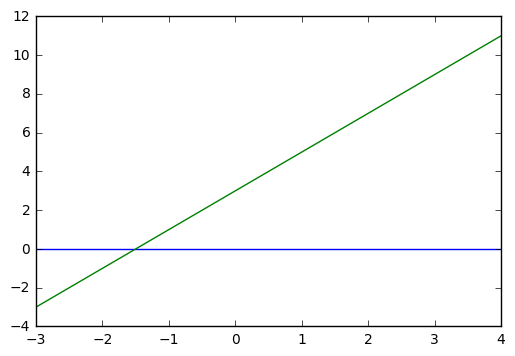

In [113]:
# A simple function for the machine to learn
def f(x):
    return 3 + 2 * x

# The machine eager to learn
class Machine:
    w = 0
    b = 0
    def h(self, x):
        return self.b + self.w * x
               
# Create the training sample: an array of random values of x for the machine to train with.
# why random though?
m = 3 # training sample size
np.random.seed(876)
training_input = np.random.randint(-5, 6, m)
print(training_input)

# Calculate correct values x of f for testing the machine
training_output = []
correct_values = []
machine = Machine()
for x in training_input:
    training_output.append(machine.h(x))
    correct_values.append(f(x))   
                                                         
# Visualize how badly the machine fails initially
#plt.plot(training_input, correct_values, 'ro')
plt.plot(training_input, training_output)
plt.plot(training_input, correct_values)
plt.show()

In [ ]:
# Now let's train the machine

[-3  0  4]
[-10, 5, 25]
[-3, 3, 11]
139


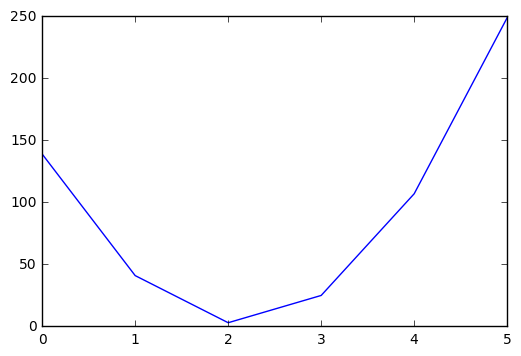

In [135]:
# Calculate the difference between machine's attempt and the correct values.

print(training_input)
print(training_output)
print(correct_values)

machine = Machine()
def loss(training_input):
    loss = 0
    for x in training_input:
        loss += (machine.h(x) - f(x))**2
        
    return loss    

print(loss(training_input))    

iterations = 6
losses = []
for i in range(0,iterations):
    losses.append(loss(training_input))     
    machine.w += 1
    machine.b += 1
   
plt.plot(losses)
plt.show()

[0, 0, 0]
[-2, 1, 5]
[-4, 2, 10]
[-6, 3, 15]
[-8, 4, 20]
[-10, 5, 25]


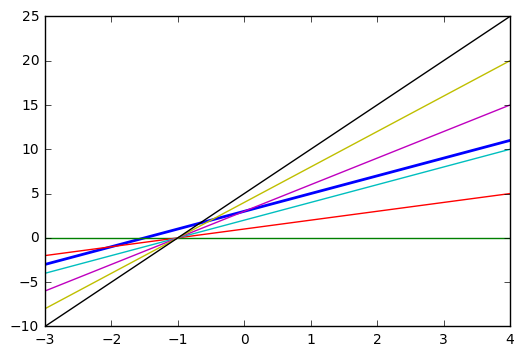

In [134]:
machine = Machine()
plt.plot(training_input, correct_values, linewidth=2.0)
for i in range(0,iterations):
    training_output = []
    for x in training_input:
        training_output.append(machine.h(x))
        
    machine.w += 1
    machine.b += 1
        
    print(training_output)    
    plt.plot(training_input, training_output)
    
plt.show()    

By a lucky strike we actually managed to get a pretty close approximation. But we want a system that can automatically adjust weight and bias in the right direction and tell when it has reached the best approximation.

# Gradient descent
Gradient descent is a popular method for doing exactly what we want: Find optimal values for the weight and bias.

Gradient is a generalization of the derivative to functions of several variables.

When we open up $l(b,w)$ we get:

$$\begin{align}
l(b,w) &= (h(x) - f(x))^2 \\
& = (b + wx - y)^2 \\
&= b^2+2bwx-2by+w^2x^2-2wxy+y^2 \\
\end{align}$$

A function with two variables can also be interpreted as a family of functions with one variable:

$$
l(b,w) = 
\begin{cases}
l_w(b) = b^2+2wxb-2yb+w^2x^2-2wxy+y^2, &\text{b is a variable, w, x, and y are constants} \\
l_b(w) = x^2w^2+2bxw-2xyw+b^2-2by+y^2, &\text{w is a variable, b, x, and y are constants} \\
\end{cases}
$$

Here $l_w$ and $l_b$ each represent a family of functions, eg. $l_w$ contains functions with every value of w. Functions have been rearranged so that the constant values are in the end.

Gradient $l'(b,w)$ is the combination of the partial derivatives $l_w'(b)$ and $l_b'(w)$. In other words $l'(b,w)$ is a vector whose components are $l_w'(b)$ and $l_b'(w)$:

$$
l'(b,w) = 
\begin{cases}
l_w'(b) = 2b+2wx-2y = 2(b+wx-y) = 2(h(x)-f(x)) \\
l_b'(w) = 2x^2w+2bx-2xy = 2x(b+wx-y) = 2x(h(x)-f(x)) \\
\end{cases}
$$

Above equation only counts for one training set ie. one value for each x and y. For m training sets the equation can be represented as a sum over m training sets:

$$\begin{align}
l(b,w) &= \sum_{i=1}^m(h(x_i)-f(x_i))^2 \\
l_w'(b) &= 2\sum_{i=1}^m(h(x_i)-f(x_i)) \\
l_b'(w) &= 2\sum_{i=1}^m(h(x_i)-f(x_i))x_i \\
\end{align}$$

139
(-22, -106)
(-22, -106)
(-14, -54)
(-6, -2)
(2, 50)
(10, 102)
(18, 154)
[139, 41, 3, 25, 107, 249]


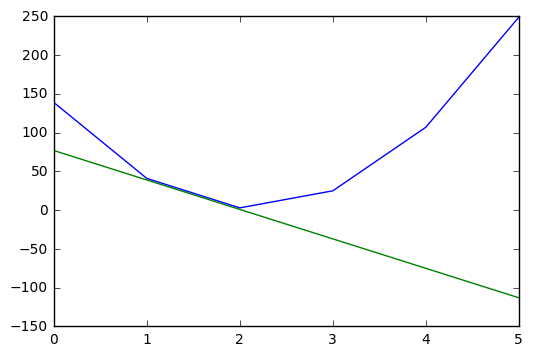

In [154]:
machine = Machine()
def loss(training_input):
    loss = 0
    for x in training_input:
        loss += (machine.h(x) - f(x))**2
        
    return loss

def gradient(x):
    bias = 0
    gradient = 0
    for x in training_input:
        bias += 2*(machine.h(x) - f(x))
        gradient += 2*(machine.h(x) - f(x)) * x
        
    return (bias, gradient)    
    

print(loss(training_input))

print(gradient(training_input))

iterations = 6
losses = []
for i in range(0,iterations):
    losses.append(loss(training_input))
    print(gradient(training_input))
    machine.w += 1
    machine.b += 1
    
#machine = Machine()
#loss1 = loss(training_input)
#machine.w += 1
#machine.b += 1
#loss2 = losses.append(loss(training_input))

print(losses)

d = []
diff12 = losses[2] - losses[1]
for i in range(0,iterations):
    d.append(diff12 * i + 77)
    
plt.plot(losses)
plt.plot(d)
plt.show()    